<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ryan Hassell

# Project 4 Part 1 (Python)

# Cleaning and Importing Data

In [14]:
import pandas as pd

In [68]:
# import the csv
adult_training = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [69]:
adult_training.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


For cleaning the data, replacing any outliers such as 0 or 99999 is the first step.

However, we must make the outliers NaN before taking the average, as the outlier values will be included in the average unless modified.

In [70]:
import numpy as np

In [74]:
# simpler way of replacing the values with NaN
adult_training['capital-gain'].replace(0, np.nan, inplace=True)
adult_training['capital-loss'].replace(0, np.nan, inplace=True)
adult_training['capital-gain'].replace(99999, np.nan, inplace=True)

Now we can replace the values with the averages.

In [75]:
# replace the NaN with the actual average of the column
adult_training['capital-gain'].replace(np.nan, adult_training['capital-gain'].mean(), inplace=True)
adult_training['capital-loss'].replace(np.nan, adult_training['capital-loss'].mean(), inplace=True)
adult_training['capital-gain'].replace(np.nan, adult_training['capital-gain'].mean(), inplace=True)

In [76]:
adult_training.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,7637.383491,1877.836676
std,13.678875,2.598297,1600.365217,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,7637.383491,1877.836676
50%,37.000000,10.000000,7637.383491,1877.836676
75%,48.000000,12.000000,7637.383491,1877.836676
max,90.000000,16.000000,41310.000000,4356.000000


Our data has been cleaned! All outliers have been taken care of.

# Contingency Table of Working Class and Sex

In order to make the contingency table of working class and sex I used the following code:

In [24]:
# create table comparing working class and sex
ws_contingency = pd.crosstab(adult_training.workclass, adult_training.sex)

And here is that contingency table

In [25]:
# display table
ws_contingency

sex,Female,Male
workclass,,
?,377,452
Federal-gov,149,305
Local-gov,377,592
Never-worked,1,4
Private,3574,6707
Self-emp-inc,54,444
Self-emp-not-inc,178,992
State-gov,201,385
Without-pay,1,4


# Plot of Contingency Table of Working Class and Sex

To plot the table I just created, I used the code:

<Axes: title={'center': 'Contingency Plot of Working Class and Sex'}, xlabel='workclass', ylabel='frequency'>

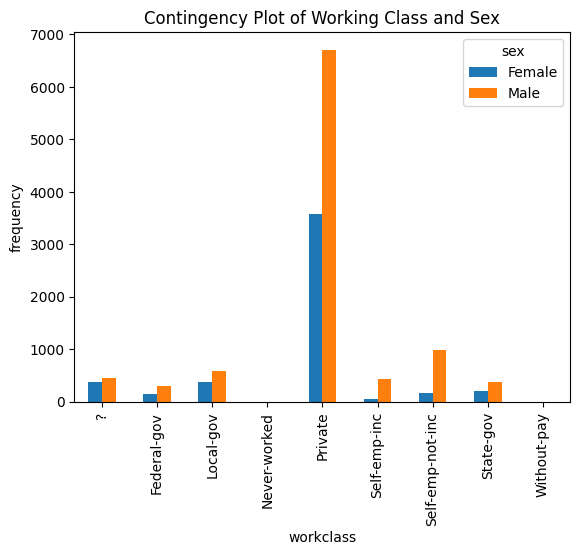

In [31]:
import matplotlib.pyplot as plt

ws_contingency.plot(kind="bar", ylabel="frequency",title="Contingency Plot of Working Class and Sex")

From this graph, we can determine that most people are working for private companies, and almost none have worked without pay or have never worked at all.

# Marital Status and Sex Contingency Table

I then did the same thing for marital status and sex.

In [37]:
# create table for marital status and sex
mss_contingency = pd.crosstab(adult_training["marital-status"], adult_training.sex)

And here is the table I created:

In [38]:
mss_contingency

sex,Female,Male
marital-status,,
Divorced,1219,795
Married-AF-spouse,7,4
Married-civ-spouse,761,6010
Married-spouse-absent,95,104
Never-married,2160,2717
Separated,290,182
Widowed,380,73


# Contingency Plot of Marital Status and Sex

Now, to make the bar plot.

<Axes: title={'center': 'Contingency Plot of Martial Status and Sex'}, xlabel='marital-status', ylabel='frequency'>

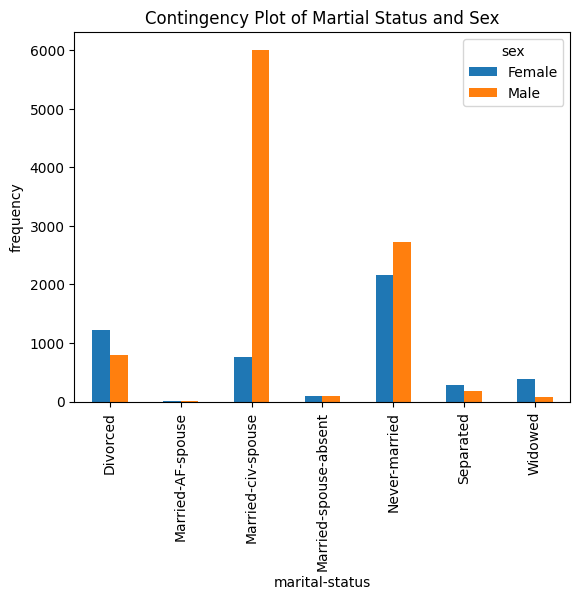

In [40]:
# plot mss table
mss_contingency.plot(kind="bar", ylabel="frequency",title="Contingency Plot of Martial Status and Sex")

From this data we can deduce that more men are married to civ-spouses, or spouses that are civilians.

# Adults over 40


Now it is time to create a data frame containing only adults above the age of 40:

In [96]:
# create DF
adultsAbove40 = adult_training[adult_training["age"] > 40]

In [97]:
# display DF
adultsAbove40

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,education_no_outliers,age_no_outliers
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,7637.383491,1877.836676,<=50K,1.128163,0.827038
2,49,Private,5,Married-spouse-absent,Other-service,Female,7637.383491,1877.836676,<=50K,-1.950881,0.753930
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,7637.383491,1877.836676,>50K,-0.411359,0.973254
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,7637.383491,2042.000000,<=50K,-1.181120,0.315282
8,54,?,10,Married-civ-spouse,?,Male,7637.383491,1877.836676,>50K,-0.026479,1.119469
...,...,...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,7637.383491,1877.836676,<=50K,0.743282,0.461498
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086.000000,1877.836676,<=50K,1.897924,1.923656
14791,43,State-gov,10,Divorced,Adm-clerical,Female,7637.383491,1877.836676,<=50K,-0.026479,0.315282
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,7637.383491,1877.836676,<=50K,-0.026479,0.315282


And now we create a table relating our dataframe to colums "marital-status" and "sex"

In [98]:
# create the table
mss_40 = pd.crosstab(adultsAbove40['marital-status'], adultsAbove40['sex'])

And here is the table!

In [99]:
mss_40

sex,Female,Male
marital-status,,
Divorced,720,448
Married-civ-spouse,305,3383
Married-spouse-absent,38,47
Never-married,256,315
Separated,133,74
Widowed,354,71


# Over 40 Martial-Sex Contingency Table Plot

Here is my graph for Marital Status and Sex above the age of 40

<Axes: title={'center': 'Contingency Plot of Martial Status and Sex Above 40'}, xlabel='marital-status', ylabel='frequency'>

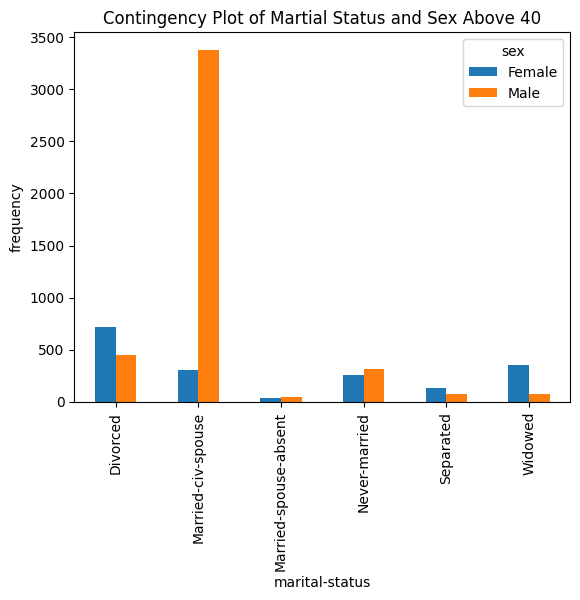

In [100]:
# plot the table
mss_40.plot(kind="bar", ylabel="frequency",title="Contingency Plot of Martial Status and Sex Above 40")

From this data we can deduce that the population above 40 is more-married than the whole population.

# Education Outliers

Now, for ridding the education column of outliers, we

In [47]:
from scipy import stats

In [78]:
#find the outliers

adult_training['education_no_outliers'] = stats.zscore(adult_training.education, nan_policy='omit')

#3 sigma rule
education_outliers = adult_training.query('(education_no_outliers > 3 | education_no_outliers < -3)')['education_no_outliers']

In [79]:
# display table
education_outliers

72      -3.105523
101     -3.490403
199     -3.105523
243     -3.105523
437     -3.105523
           ...   
14254   -3.105523
14318   -3.105523
14475   -3.105523
14551   -3.490403
14724   -3.105523
Name: education_no_outliers, Length: 113, dtype: float64

I've determined that the # of outliers in education is 113!

#Age Outliers


In order to determine outliers for the Age column, I used this code:

In [89]:
# find outliers
adult_training['age_no_outliers'] = stats.zscore(adult_training.age, nan_policy='omit')

# 3 sigma rule
age_outliers = adult_training.query('(age_no_outliers > 3 | age_no_outliers < -3)')['age_no_outliers']

# find # outliers
num_outliers = len(age_outliers)

# greatest outlier
max_outlier = age_outliers.abs().idxmax()

#get the max outlier's age
max_age = adult_training['age'].loc[max_outlier]

print("The greatest outlier (max) is", max_age)
print("Number of outliers:", num_outliers)

The greatest outlier (max) is 90
Number of outliers: 60


You can also get the number of outliers by running

```
age_outliers.describe()
```



So from this, we deduce that there are exactly sixty outliers, the highest of which is 90.

# Age Anomalies Check

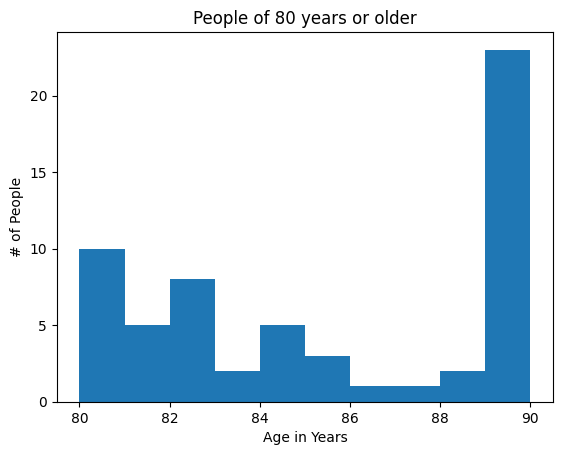

In [92]:
# make table of people >= 80
anomalies = adult_training[adult_training['age'] >= 80]

# create the graph
plt.hist(anomalies['age'])
plt.xlabel('Age in Years')
plt.title('People of 80 years or older')
plt.ylabel('# of People')
plt.show()

From this graph, I can deduce that an overwhelming majority of people are between the ages of 88-90 within this set of people.

## Summary

Following cleaning the data and creation of tables and graphs, I can deduce a few things:
*   The majority of people in the working class work at private firms
*   The majority of men are married to civ-spouses
*   The majority of people above 40 are married
*   The majority of individuals above 80 years of age are between 88 years and 90 years old